In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
import k3d
import matplotlib.pyplot as plt
from sloppy.optic import *
from sloppy.raytracing import *
from sloppy.abcd import *
from sloppy.utils import *
from sloppy.tools import *

In [2]:
def LensCavML(flong=100.0, fmla=6.0, eps_grin=0.1, eps_long=-4.2, eps_mirr=-4.0, eps_mirr2=0, eps_mla=0.05, lens_diam=25.4, grin_diam=2.4, grin_thick=1.020, lens_thick=6.0, mla_thick=4.0):
    
    wdgrin = 0.8
    fgrin=1.5
    
    p_grin_f = wdgrin + eps_grin
    p_grin_b = p_grin_f + grin_thick
    p_long_f = p_grin_b + fgrin + flong + eps_long
    p_long_b = p_long_f + lens_thick
    p_mla_f = p_long_b + flong + eps_mla
    p_mla_b = p_mla_f + mla_thick 
    p_mirr = p_long_b + flong + eps_mirr
    p_mirr_mla = p_mla_b + fmla + eps_mirr2 - eps_mla
    
    p00 = np.array([0,0,0])
    p0 = np.array([0,0,p_grin_f])
    p1 = np.array([0,0,p_grin_b])
    p2 = np.array([0,0,p_long_f])
    p3 = np.array([0,0,p_long_b])
    p3b = np.array([0,0,p_mla_f])
    p3c = np.array([0,0,p_mla_b])
    p4 = np.array([0,0,p_mirr_mla])

    pm0 = np.array([0,0,-p_grin_f])
    pm1 = np.array([0,0,-p_grin_b])
    pm2 = np.array([0,0,-p_long_f])
    pm3 = np.array([0,0,-p_long_b])
    pm4 = np.array([0,0,-p_mirr])

    e = np.array([0,0,5.0])*0
    
    ii = lens_diam
    hi = 12.7
    qi=7.75
    ng = 1.4537

    # Rgrin = (ng-1)*fgrin
    Rlong = (ng-1)*flong
    # now C140 instead of "spherical" GRIN lens
    Rgrin = -0.840660
    k=-0.963070
    An=[-9.476566e-2, -2.790461e-2, -5.415580e-3, -3.553653e-3]
    Rmla = (ng-1)*fmla
    
    coeff = np.array([Rgrin, k,] + An) #these coefficients go _away_ from the normal
    coeffm = coeff*-1 #these coefficients go _to_ the normal
    coeffm[1] = k
    
    nz = (0., 0. ,-1.0)
    nzm = (0., 0. ,1.0)
    axz = (-1, 0, 0)
    axzm = (1, 0, 0)

    screen = Screen(n=nzm, ax=axzm)
    screen2 = Screen(n=nzm, ax=axzm)

    mla = MicroLensArray(
        p=p3c,         # Position at z=10
        n=nz,          # Normal in +z direction
        ax=axz,
        diameter=ii,        # 10mm overall diameter 
        R=-Rmla,                # 0.5mm radius of curvature for each lenslet
        curv='CC',            # Concave lenslets
        n1=ng,               # Air on incident side
        n2=1.0,               # Glass on exit side
        a1=(0.5, 0),          # 100µm spacing in x
        a2=(0, 0.5),          # 100µm spacing in y
        origin_centered=True  # Center the first lenslet at the origin
    )

    
    # negative sign of first cuved surface for abcd matrix
    elements_r = [
                Glass(p=p0, n=nz, ax=axz, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=p1, n=nz, ax=axz, diameter=grin_diam, n1=ng, coef=coeffm), #R=-Rgrin,
                Glass(p=p2, n=nz, ax=axz, diameter=ii, n2=ng),
                CurvedGlass(p=p3, n=nz, ax=axz, diameter=ii, R=-Rlong, curv='CC', n1=ng),
                Glass(p=p3b, n=nz, ax=axz, diameter=ii, n2=ng),
                mla,
                ]

    elements_l = [Glass(p=pm0, n=nzm, ax=axzm, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=pm1, n=nzm, ax=axzm, diameter=grin_diam, n1=ng, coef=coeffm),
                Glass(p=pm2, n=nzm, ax=axzm, diameter=ii, n2=ng),
                CurvedGlass(p=pm3, n=nzm, ax=axzm, diameter=ii, R=-Rlong, curv='CC', n1=ng),
                ]
    screenmirr = Screen(p=p4, n=nz, ax=axz)
    # return [screen, *elements_r, Mirror(p=p4, n=nz, ax=axz, diameter=ii), *(elements_r[::-1]), screen2]#*elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), screen2]
    return [screenmirr, *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), *(elements_r), screenmirr]#, screen2]

In [2]:
def LensCavML(flong=100.0, fmla=14.2, eps_grin=-0.37, eps_long=-4.2, eps_mirr=0, eps_mla=2.00, lens_diam=25.4, grin_diam=2.4, grin_thick=1.020, lens_thick=6.0, mla_thick=1.0):
    
    wdgrin = 0.8
    fgrin=1.5
    
    p_grin_f = fgrin + eps_grin
    p_grin_b = p_grin_f + grin_thick
    p_long_f = p_grin_b + fgrin + flong + eps_long
    p_long_b = p_long_f + lens_thick
    p_mla_f = p_long_b + flong + eps_mla
    p_mla_b = p_mla_f + mla_thick 
    p_mirr = p_long_b + flong 
    p_mirr_mla = p_mla_b + fmla + eps_mirr
    
    p00 = np.array([0,0,0])
    p0 = np.array([0,0,p_grin_f])
    p1 = np.array([0,0,p_grin_b])
    p2 = np.array([0,0,p_long_f])
    p3 = np.array([0,0,p_long_b])
    p3b = np.array([0,0,p_mla_f])
    p3c = np.array([0,0,p_mla_b])
    p4 = np.array([0,0,p_mirr_mla])

    pm0 = np.array([0,0,-p_grin_f])
    pm1 = np.array([0,0,-p_grin_b])
    pm2 = np.array([0,0,-p_long_f])
    pm3 = np.array([0,0,-p_long_b])
    pm4 = np.array([0,0,-p_mirr])

    e = np.array([0,0,5.0])*0
    
    ii = lens_diam
    hi = 12.7
    qi=7.75
    ng = 1.4537

    # Rgrin = (ng-1)*fgrin
    Rlong = (ng-1)*flong
    # now C140 instead of "spherical" GRIN lens
    Rgrin = -0.840660
    k=-0.963070
    An=[-9.476566e-2, -2.790461e-2, -5.415580e-3, -3.553653e-3]
    Rmla = (ng-1)*fmla
    
    coeff = np.array([Rgrin, k,] + An) #these coefficients go _away_ from the normal
    coeffm = coeff*-1 #these coefficients go _to_ the normal
    coeffm[1] = k
    
    nz = (0., 0. ,-1.0)
    nzm = (0., 0. ,1.0)
    axz = (-1, 0, 0)
    axzm = (1, 0, 0)

    screen = Screen(n=nzm, ax=axzm)
    screen2 = Screen(n=nzm, ax=axzm)

    mla = MicroLensArray(
        p=p3c,         # Position at z=10
        n=nz,          # Normal in +z direction
        ax=axz,
        diameter=ii,        # 10mm overall diameter 
        R= -Rmla,                # 0.5mm radius of curvature for each lenslet
        curv='CC',            # Concave lenslets
        n1=ng,               # Air on incident side
        n2=1.0,               # Glass on exit side
        a1=(0.5, 0),          # 100µm spacing in x
        a2=(0, 0.5),          # 100µm spacing in y
        origin_centered=True  # Center the first lenslet at the origin
    )

    
    # negative sign of first cuved surface for abcd matrix
    elements_r = [
                Glass(p=p0, n=nz, ax=axz, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=p1, n=nz, ax=axz, diameter=grin_diam, n1=ng, coef=coeffm), #R=-Rgrin,
                Glass(p=p2, n=nz, ax=axz, diameter=ii, n2=ng),
                CurvedGlass(p=p3, n=nz, ax=axz, diameter=ii, R=-Rlong, curv='CC', n1=ng),
                Glass(p=p3b, n=nz, ax=axz, diameter=ii, n2=ng),
                mla,
                ]

    elements_l = [Glass(p=pm0, n=nzm, ax=axzm, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=pm1, n=nzm, ax=axzm, diameter=grin_diam, n1=ng, coef=coeffm),
                Glass(p=pm2, n=nzm, ax=axzm, diameter=ii, n2=ng),
                CurvedGlass(p=pm3, n=nzm, ax=axzm, diameter=ii, R=-Rlong, curv='CC', n1=ng),
                ]
    screenmirr = Screen(p=p4, n=nz, ax=axz)
    # return [screen, *elements_r, Mirror(p=p4, n=nz, ax=axz, diameter=ii), *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), screen2]
    return [screen, *elements_r, Mirror(p=p4, n=nz, ax=axz, diameter=ii), *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), screen2]
    # return [screenmirr, *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), *(elements_r), screenmirr]#, screen2]

In [2]:
def LensCavML(flong=100.0, fmla=14.2, eps_grin=-0.37, eps_long=-4.2, eps_mirr=0, eps_mla=2.00, lens_diam=25.4, grin_diam=2.4, grin_thick=1.020, lens_thick=6.0, mla_thick=1.0):
    
    wdgrin = 0.8
    fgrin=1.5
    
    p_grin_f = fgrin + eps_grin
    p_grin_b = p_grin_f + grin_thick
    p_long_f = p_grin_b + fgrin + flong + eps_long
    p_long_b = p_long_f + lens_thick
    p_mla_f = p_long_b + flong + eps_mla
    p_mla_b = p_mla_f + mla_thick 
    p_mirr = p_long_b + flong 
    p_mirr_mla = p_mla_b + fmla + eps_mirr
    
    p00 = np.array([0,0,0])
    p0 = np.array([0,0,p_grin_f])
    p1 = np.array([0,0,p_grin_b])
    p2 = np.array([0,0,p_long_f])
    p3 = np.array([0,0,p_long_b])
    p3b = np.array([0,0,p_mla_f])
    p3c = np.array([0,0,p_mla_b])
    p4 = np.array([0,0,p_mirr_mla])

    pm0 = np.array([0,0,-p_grin_f])
    pm1 = np.array([0,0,-p_grin_b])
    pm2 = np.array([0,0,-p_long_f])
    pm3 = np.array([0,0,-p_long_b])
    pm4 = np.array([0,0,-p_mirr])

    e = np.array([0,0,5.0])*0
    
    ii = lens_diam
    hi = 12.7
    qi=7.75
    ng = 1.4537

    # Rgrin = (ng-1)*fgrin
    Rlong = (ng-1)*flong
    # now C140 instead of "spherical" GRIN lens
    Rgrin = -0.840660
    k=-0.963070
    An=[-9.476566e-2, -2.790461e-2, -5.415580e-3, -3.553653e-3]
    Rmla = (ng-1)*fmla
    
    coeff = np.array([Rgrin, k,] + An) #these coefficients go _away_ from the normal
    coeffm = coeff*-1 #these coefficients go _to_ the normal
    coeffm[1] = k
    
    nz = (0., 0. ,-1.0)
    nzm = (0., 0. ,1.0)
    axz = (-1, 0, 0)
    axzm = (1, 0, 0)

    screen = Screen(n=nzm, ax=axzm)
    screen2 = Screen(n=nzm, ax=axzm)

    mla = MicroLensArray(
        p=p3c,         # Position at z=10
        n=nz,          # Normal in +z direction
        ax=axz,
        diameter=ii,        # 10mm overall diameter 
        R= Rmla,                # 0.5mm radius of curvature for each lenslet
        curv='CC',            # Concave lenslets
        n1=ng,               # Air on incident side
        n2=1.0,               # Glass on exit side
        a1=(0.5, 0),          # 100µm spacing in x
        a2=(0, 0.5),          # 100µm spacing in y
        origin_centered=True  # Center the first lenslet at the origin
    )

    
    # negative sign of first cuved surface for abcd matrix
    elements_r = [
                Glass(p=p0, n=nz, ax=axz, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=p1, n=nz, ax=axz, diameter=grin_diam, n1=ng, coef=coeffm), #R=-Rgrin,
                Glass(p=p2, n=nz, ax=axz, diameter=ii, n2=ng),
                CurvedGlass(p=p3, n=nz, ax=axz, diameter=ii, R=Rlong, curv='CC', n1=ng),
                Glass(p=p3b, n=nz, ax=axz, diameter=ii, n2=ng),
                mla,
                ]

    elements_l = [Glass(p=pm0, n=nzm, ax=axzm, diameter=grin_diam, n2=ng),
                ThorlabsAsphere(p=pm1, n=nzm, ax=axzm, diameter=grin_diam, n1=ng, coef=coeffm),
                Glass(p=pm2, n=nzm, ax=axzm, diameter=ii, n2=ng),
                CurvedGlass(p=pm3, n=nzm, ax=axzm, diameter=ii, R=Rlong, curv='CC', n1=ng),
                ]
    screenmirr = Screen(p=p4, n=nz, ax=axz)
    # return [screen, *elements_r, Mirror(p=p4, n=nz, ax=axz, diameter=ii), *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), screen2]
    # return [screen, *elements_r, Mirror(p=p4, n=nz, ax=axz, diameter=ii), *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), screen2]
    return [screenmirr, *(elements_r[::-1]), *elements_l, Mirror(p=pm4, n=nzm, ax=axzm, diameter=ii), *(elements_l[::-1]), *(elements_r), screenmirr]#, screen2]

In [3]:
def source_MLA_bundle(Nx=2, Ny=None, Nsx=5, Nsy=None, dx=0.5, dy=None, sx=1e-3, sy=None, Nex=0, Ney=None, ex=0, ey=None):
    if Ny is None:
        Ny = Nx

    if Nsy is None:
        Nsy = Nsx

    if dy is None:
        dy = dx

    if sy is None:
        sy = sx

    if Ney is None:
        Ney = Nex

    if ey is None:
        ey = ex

    # make iterators for x and y displacements and slopes and little epsilon displacements around MLA positions
    it_x = np.linspace(-dx*Nx, dx*Nx, 2*Nx+1) if Nx>0 else np.array([0])
    it_y = np.linspace(-dy*Ny, dy*Ny, 2*Ny+1) if Ny>0 else np.array([0])
    it_sx = np.linspace(-sx*Nsx, sx*Nsx, 2*Nsx+1) if Nsx>0 else np.array([0])
    it_sy = np.linspace(-sy*Nsy, sy*Nsy, 2*Nsy+1) if Nsy>0 else np.array([0])
    it_ex = np.linspace(-ex*Nex, ex*Nex, 2*Nex+1) if Nex>0 else np.array([0])
    it_ey = np.linspace(-ey*Ney, ey*Ney, 2*Ney+1) if Ney>0 else np.array([0])

    # iterate over all combinations of the iterators using itertools.product and make a bundle id for every x and y location
    mus = np.stack([[x+ex, y+ey, sx, sy] for x in it_x for y in it_y for sx in it_sx for sy in it_sy for ex in it_ex for ey in it_ey], axis=0)
    bundle_ids = np.stack([[i, j] for i, x in enumerate(it_x) for j, y in enumerate(it_y) for k, sx in enumerate(it_sx) for l, sy in enumerate(it_sy) for m, ex in enumerate(it_ex) for n, ey in enumerate(it_ey)], axis=0)


    return mus, bundle_ids

In [4]:
def SingleLensCav(R=10, L=10):
    source = Source(p=(0, 0, 0), n=(0, 0, -1), ax=(-1, 0, 0), diameter=10.0)

    # Define other elements (simplified example)
    lens1 = Glass(p=(0, 0, L), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, n1=1.0, n2=1.5)

    lens2 = CurvedGlass(p=(0, 0, L+5), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, R=R, curv='CC', n1=1.5, n2=1.0)

    mirror = Mirror(p=(0, 0, 2*L+5), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4)

    # Create system with the source at index 0
    elements = [source, lens1, lens2, mirror, lens2, lens1, source]
    return elements

In [5]:
def DoubleLensCav(R=10, L=10, d=11):
    source = Source(p=(0, 0, 0), n=(0, 0, -1), ax=(-1, 0, 0), diameter=10.0)

    # Define other elements (simplified example)
    lens1 = Glass(p=(0, 0, L), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, n1=1.0, n2=1.5)

    lens2 = CurvedGlass(p=(0, 0, L+5), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, R=R, curv='CC', n1=1.5, n2=1.0)

    lens3 = CurvedGlass(p=(0, 0, L+5+d), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, R=R, curv='CX', n1=1.0, n2=1.5)

    lens4 = Glass(p=(0, 0, L+5+d+5), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4, n1=1.5, n2=1.0)

    el_a = [lens1, lens2, lens3, lens4]

    mirror = Mirror(p=(0, 0, 2*L+10+d), n=(0, 0, -1), ax=(-1, 0, 0), diameter=25.4)

    # Create system with the source at index 0
    # elements = [source, lens1, lens2, lens3, lens4, mirror, lens4, lens3, lens2, lens1, source]
    elements = [source, *el_a, mirror, *el_a[::-1], source]
    return elements

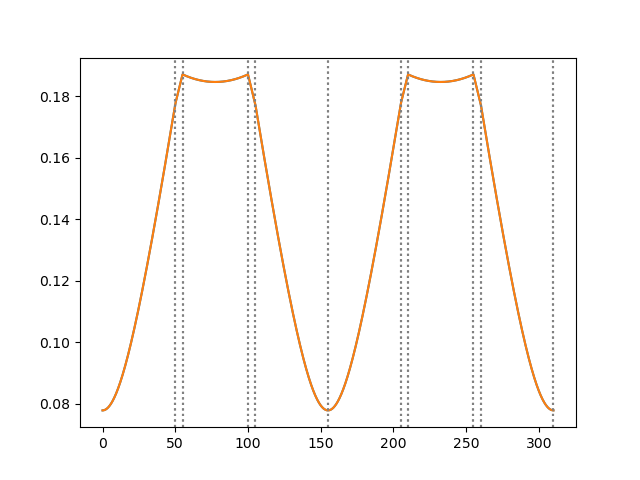

In [6]:
elements = DoubleLensCav(R=30, L=50, d=45)
sys = RaySystem(elements, add_screen=False)
system = sys.abcd
stable = system.is_stable

x = np.linspace(0, system.Ltot, 5000)
ws = system.compute_waists(x)

plt.figure()
plt.plot(x, ws)

for i, e in enumerate(system.elements):
    if type(e)!=Prop:
        plt.axvline(e.x, color='grey', ls=':')
# plt.yscale('log')
plt.show()

In [7]:
# 2d stability diagram of system as a function of two parameters
def stability_func(cavfct, kwargs):
    elements = cavfct(**kwargs)
    sys = RaySystem(elements, add_screen=False)
    system = sys.abcd
    # stable = system.is_stable
    stable = np.trace(system.abcd_rt)*0.5/2
    if abs(stable)<=1:
        waist = system.waist_at(0)
        freqs = system.get_freqs(s=1)[1]
    else:
        waist = np.array([np.nan, np.nan])
        freqs = np.array([np.nan, np.nan])
    
    return stable, waist, freqs

def stability_diagram(cavfct, par1_name, par2_name, par1_range, par2_range):
    stable = np.zeros((len(par1_range), len(par2_range)))
    waist = np.zeros((len(par1_range), len(par2_range), 2))
    # transverse mode splitting
    tms = np.zeros((len(par1_range), len(par2_range), 2))
    for i, par1 in enumerate(par1_range):
        for j, par2 in enumerate(par2_range):
            kwargs = {par1_name: par1, par2_name: par2}
            stable[i, j], waist[i, j], tms[i, j] = stability_func(cavfct, kwargs)
    return stable, waist, tms

par1_name = 'eps_long'
par2_name = 'eps_grin'

par1_range = -3.79 + np.linspace(-0.5, 0.5, 50)*10
par2_range = -0.35 + np.linspace(-0.1, 0.1, 50)*10

# par1_name = 'R'
# par1_name = 'd'
# par2_name = 'L'

# par1_range = np.linspace(1, 49, 40)
# par2_range = np.linspace(1, 100, 20)



stable, waists, freqs = stability_diagram(LensCavML, par1_name, par2_name, par1_range, par2_range)
# stable, waists = stability_diagram(SingleLensCav, par1_name, par2_name, par1_range, par2_range)
# stable, waists = stability_diagram(DoubleLensCav, par1_name, par2_name, par1_range, par2_range)

/Users/lukas/code/sloppy/src/sloppy/abcd.py:267: RuntimeWarning: invalid value encountered in sqrt
  musN = [mus[:,i]*np.sqrt(2/nn0[i]) for i in range(len(mus))]
/Users/lukas/code/sloppy/src/sloppy/abcd.py:278: RuntimeWarning: invalid value encountered in sqrt
  musN = np.stack([mus[:,i]*np.sqrt(2/N[i]) for i in range(2)], axis=0)


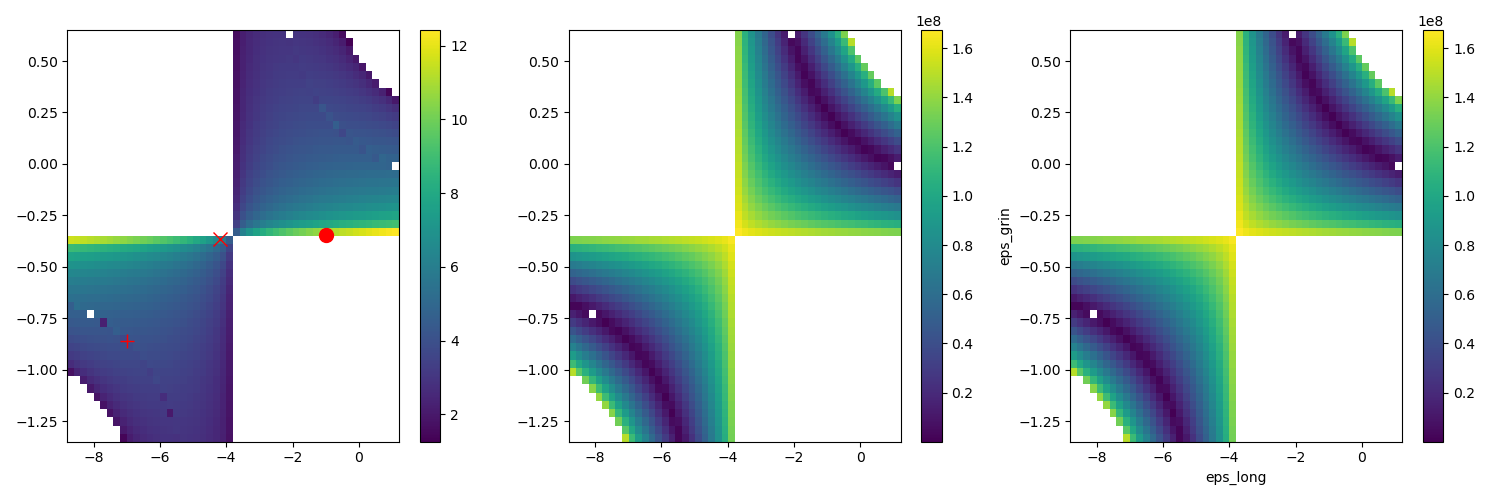

In [8]:
# plot stable regions in a 2d plot
f, ax = plt.subplots(1, 3, figsize=(15, 5))
# plt.imshow(stable.T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], vmin=0, vmax=1, aspect='auto')
im = ax[0].imshow(1e3*waists[:,:,0].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
im2 = ax[1].imshow(freqs[:,:,0].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
im3 = ax[2].imshow(freqs[:,:,1].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
plt.colorbar(im, ax=ax[0])
plt.colorbar(im2, ax=ax[1])
plt.colorbar(im3, ax=ax[2])
plt.xlabel(par1_name)
plt.ylabel(par2_name)
plt.tight_layout()

# try a couple of points in the stable region
conf_a = {'eps_long': -4.2, 'eps_grin': -0.363}
conf_b = {'eps_long': -1.0, 'eps_grin': -0.345}
conf_c = {'eps_long': -7, 'eps_grin': -0.861}

ax[0].plot(conf_a[par1_name], conf_a[par2_name], 'rx', ms=10)
ax[0].plot(conf_b[par1_name], conf_b[par2_name], 'ro', ms=10)
ax[0].plot(conf_c[par1_name], conf_c[par2_name], 'r+', ms=10)

plt.show()


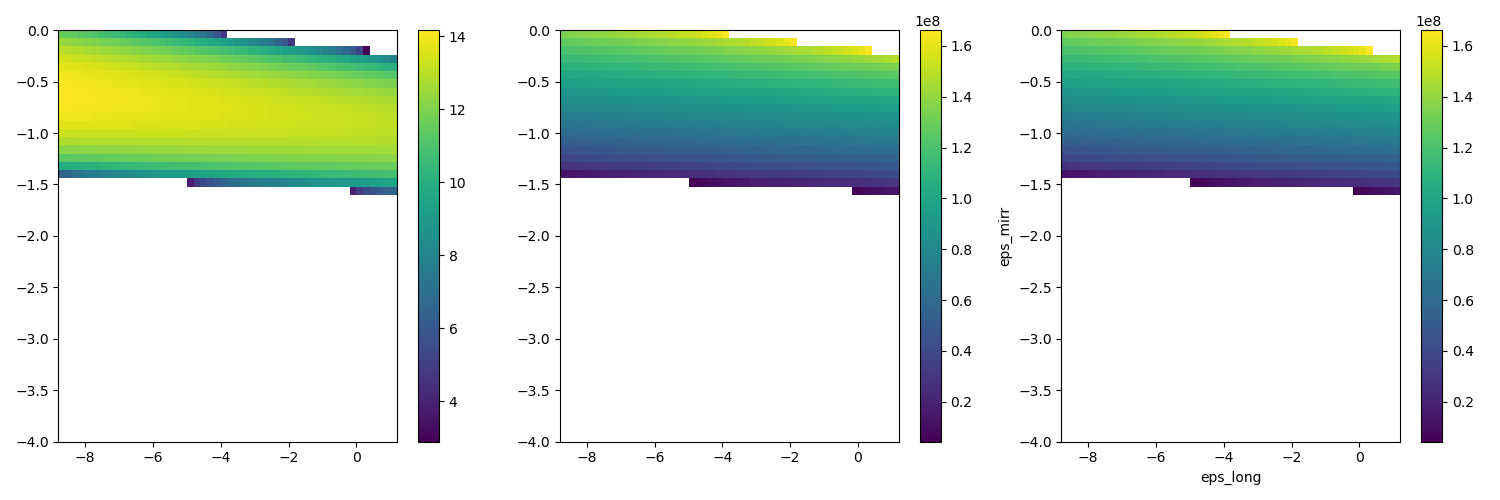

In [106]:
par1_name = 'eps_long'
par2_name = 'eps_mirr'

par1_range = -3.79 + np.linspace(-0.5, 0.5, 50)*10
par2_range = -2+ np.linspace(-0.1, 0.1, 50)*10*2


stable, waists, freqs = stability_diagram(LensCavML, par1_name, par2_name, par1_range, par2_range)
f, ax = plt.subplots(1, 3, figsize=(15, 5))
# plt.imshow(stable.T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], vmin=0, vmax=1, aspect='auto')
im = ax[0].imshow(1e3*waists[:,:,0].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
im2 = ax[1].imshow(freqs[:,:,0].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
im3 = ax[2].imshow(freqs[:,:,1].T, origin='lower', extent=[par1_range[0], par1_range[-1], par2_range[0], par2_range[-1]], aspect='auto')
plt.colorbar(im, ax=ax[0])
plt.colorbar(im2, ax=ax[1])
plt.colorbar(im3, ax=ax[2])
plt.xlabel(par1_name)
plt.ylabel(par2_name)
plt.tight_layout()

In [89]:
# elements = LensCavML(eps_long=-4.2+0.5, eps_grin=0, eps_mla=0.0, eps_mirr2=0)
# elements = LensCavML(eps_long=-4.2, eps_grin=0.2+0.05*3, eps_mla=3.0, eps_mirr2=0)
pp = {'flong': 100.0,
 'fmla': 14.22,
 'eps_grin': -0.346,
 'eps_long': -3.8,
 'eps_mirr': 0.0,
 'eps_mla': 2.0,
 'lens_diam': 25.44,
 'grin_diam': 2.4}

# elements = LensCavML(**pp)
# elements = LensCavML(**conf_a)
elements = LensCavML(**conf_a)
# elements = sysMLA()
screen = elements[0]
sys = RaySystem(elements, add_screen=False)
sys.screen = screen

Mag = 6/100.0

mu, bundle_id = source_MLA_bundle(Nx=5, Ny=0, Nsx=2, Nsy=0, dx=0.5, sx=5-4, Nex=0, ex=2e-3)
# mu, bundle_id = source_MLA_bundle(Nx=2, Ny=0, Nsx=2, Nsy=0, dx=0.00931, sx=5-4, Nex=0, ex=2e-3)

# make the (i,j) bundle id a 1d array by adding i+j*Nx for every i,j pair
Nx = len(np.unique(bundle_id[:,0]))
bundle_ids = bundle_id[:,0] + bundle_id[:,1]*Nx

N = len(np.unique(bundle_ids))
viridis = plt.cm.viridis

# Extract N evenly spaced colors from viridis
colors = viridis(np.linspace(0, 1, N))

ray = sys.screen.eigenvectors_to_rays(mu)
traj = sys.propagate(ray, at_screen=False, clip=False)

/Users/lukas/code/sloppy/src/sloppy/optic.py:101: RuntimeWarning: invalid value encountered in sqrt
  s0 = np.stack([mu[:,0], mu[:,1], np.sqrt(1 - (mu[:,0])**2 - (mu[:,1])**2)], axis=1) #create vector normal to screen


In [90]:
system = sys.abcd
mu1, mu2 = system.q
waist = system.waist_at(0)[0] #fix for now since waist is not at 0 anymore!
rmu1 = np.linalg.norm(np.real(mu1[:2]))
rmu2 = np.linalg.norm(np.real(mu2[:2]))
# ar, ap, br, bp = 3e-1, 0, 0, 0
ar, ap, br, bp = 0.1, 0, 0.1, 0

mu = np.real(ar*waist/rmu1*mu1*np.exp(1j*ap) + br*waist/rmu2*mu2*np.exp(1j*bp))
ray0 = sys.screen.eigenvectors_to_rays(mu)
traj_hit = sys.propagate(ray0, Nrt=1, at_screen=False)

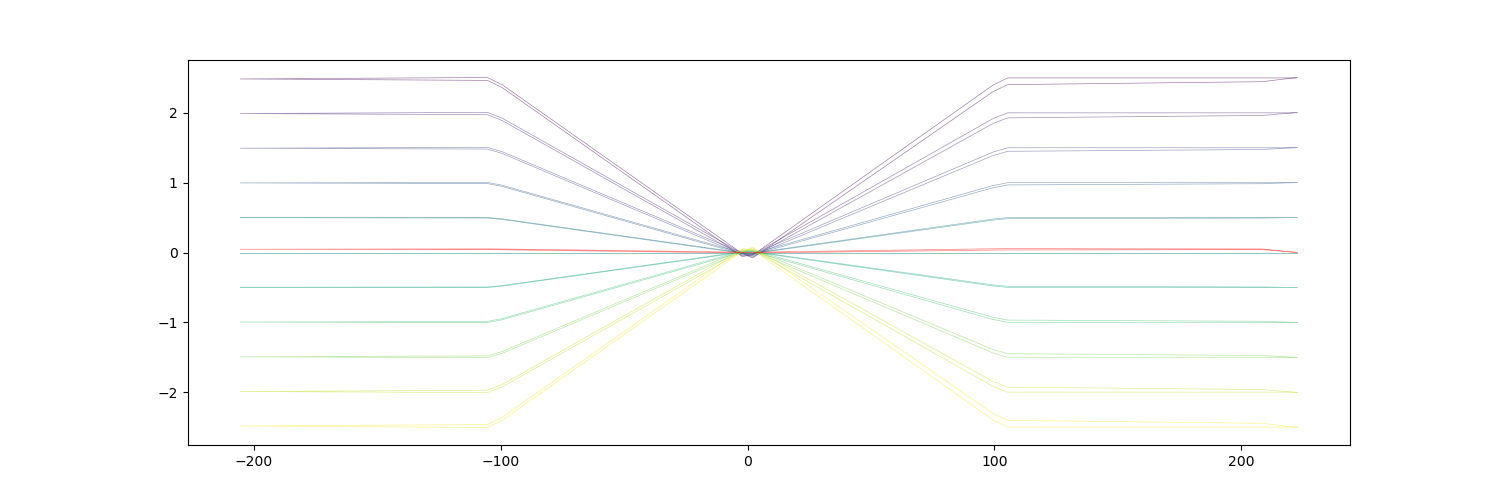

In [91]:
# make the plot
lines = []
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
plane = 'x'
k = 0 if plane == 'x' else 1
for i in range(traj.shape[2]):
    l = plt.plot(traj[:, 0, i, 2], traj[:, 0, i, k], color=colors[bundle_ids[i]], alpha=0.5, lw=0.5)[0]
    lines.append(l)

plt.plot(traj_hit[:, 0, 0, 2], traj_hit[:, 0, 0, k], color='r', alpha=0.5, lw=0.5)[0]

In [92]:
def get_abcd(sys, epsx = 2e-4, epss = 1e-3, mu_offset = np.zeros(4, dtype=np.float64)):
    mu_eps = np.array([[0, 0, 0, 0],
                [-epsx, 0, 0, 0],
                [epsx, 0, 0, 0],
                [0,-epsx,  0, 0],
                [0, epsx, 0, 0],
                [0, 0, -epss, 0],
                [0, 0, epss, 0],
                [0, 0, 0, -epss],
                [0, 0, 0, epss],
               ], dtype=np.float64)
    
    mu_eps += mu_offset
    
    ray_eps = sys.screen.eigenvectors_to_rays(mu_eps)
    traj_eps = sys.propagate(ray_eps, at_screen=False, clip=False, Nrt=1)
    mu_post = sys.screen.rays_to_eigenvectors(traj_eps[-1,:,:,:])
    mu_post[:,:] -= mu_post[0,:]
    # assert np.allclose(mu_post[0,:], np.zeros(4)), f"the ray didn't come back to it's starting point"
    abcd = np.stack([(mu_post[2]-mu_post[1])/epsx, (mu_post[4]-mu_post[3])/epsx, (mu_post[6]-mu_post[5])/epss, (mu_post[8]-mu_post[7])/epss], axis=-1)*0.5
    return abcd

In [99]:
Ng = 3
mu_offset, idx_offset = source_MLA_bundle(Nx=Ng, Ny=Ng, dx=0.5, Nsx=0, Nex=0)

abcds = np.zeros((len(mu_offset), 4, 4))
waists = np.zeros((len(mu_offset), 2))
freqs = np.zeros((len(mu_offset), 4))
abcd_sys = sys.abcd
for i, mu in enumerate(mu_offset):
    abcds[i,:,:] = get_abcd(sys, mu_offset=mu)
    freqs[i,:] = np.concatenate(abcd_sys.M2freq(abcds[i]))
    _Q = abcd_sys.M2BiK(abcds[i])
    waists[i,:] = abcd_sys.solve_mode(_Q)

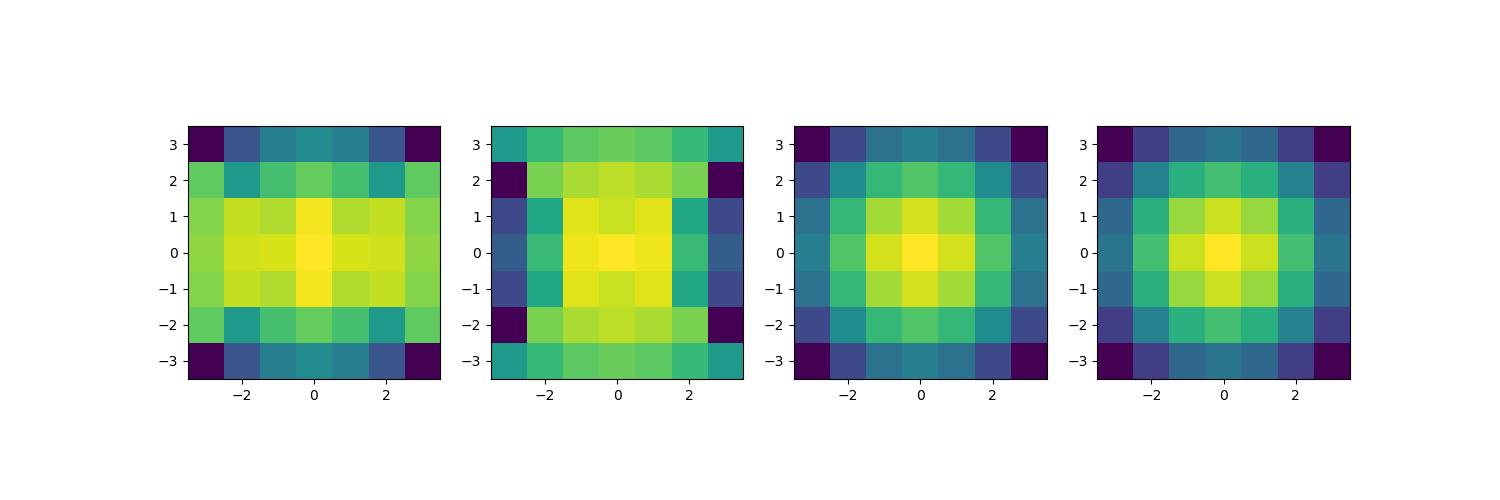

In [100]:
f, ax = plt.subplots(ncols=4, figsize=(15, 5))
Np = 2*Ng+1
waists_2d = waists.reshape(Np,Np,2)
freqs_2d = freqs.reshape(Np,Np,4)
im_kwargs = {'origin': 'lower', 'extent': [-Np*0.5, Np*0.5, -Np*0.5, Np*0.5], 'aspect': 1}
ax[0].imshow(waists_2d[:,:,0], **im_kwargs)
ax[1].imshow(waists_2d[:,:,1], **im_kwargs)
ax[2].imshow(freqs_2d[:,:,0], **im_kwargs)
ax[3].imshow(freqs_2d[:,:,1], **im_kwargs)


plt.show()

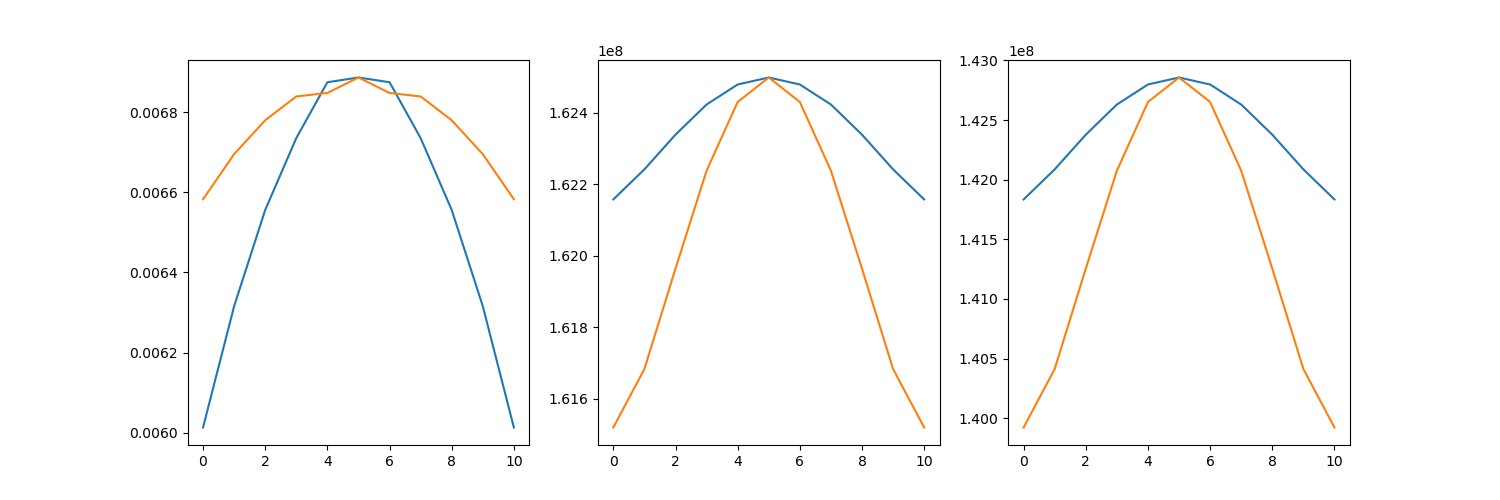

In [74]:
f, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].plot(waists[:,0])
ax[0].plot(waists[:,1])
ax[1].plot(freqs[:,0])
ax[1].plot(freqs[:,1])
ax[2].plot(freqs[:,2])
ax[2].plot(freqs[:,3])
plt.show()

interactive(children=(FloatSlider(value=-3.8, description='eps_long', layout=Layout(height='30px', width='80%'…

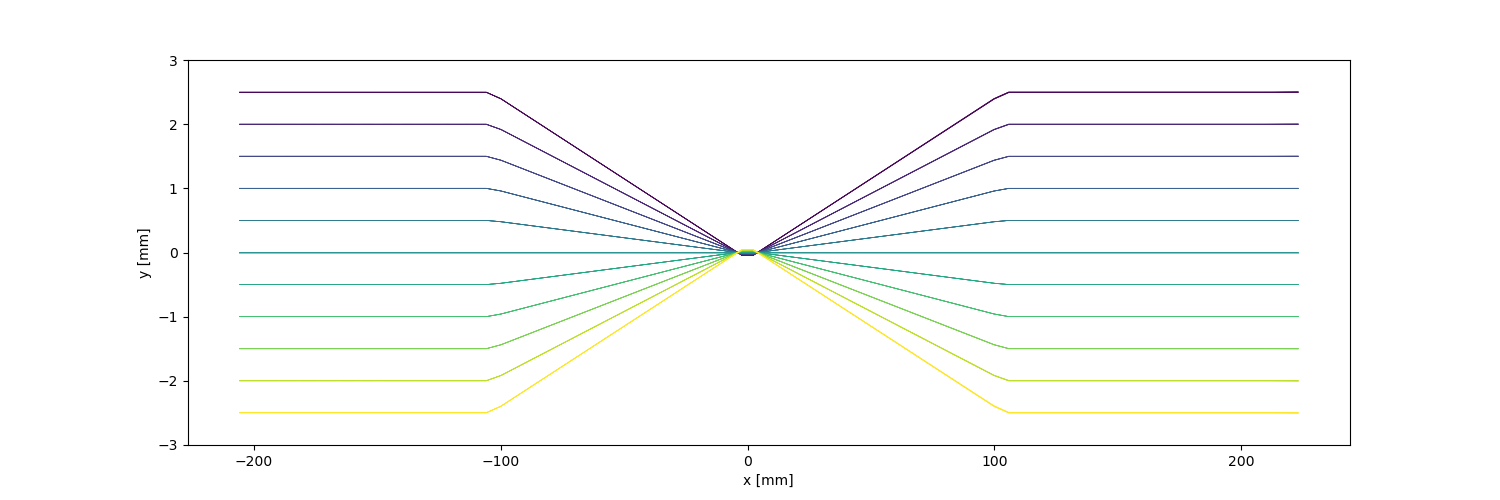

In [104]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
ms = 8.

# now let's make the x-z plot of the rays interactive using ipywidgets
# make the plot
lines = []
for i in range(traj.shape[2]):
    l = plt.plot(traj[:, 0, i, 2], traj[:, 0, i, 0], color=colors[bundle_ids[i]], alpha=0.5, lw=0.5)[0]
    lines.append(l)

plt.ylim(-3,3)



plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

cavfct = LensCavML

def update_xygrid(cavfct, eps_long=-4.2, eps_grin=0.35, eps_mirr=0, eps_mla=3.0, Nbundle = 3, Narr = 2, div=0.02, **kwargs):
    elements = LensCavML(eps_long=eps_long, eps_grin=eps_grin, eps_mla=eps_mla, eps_mirr=eps_mirr)
    # elements = LensCavML()
    screen = elements[0]
    sys = RaySystem(elements, add_screen=False)
    sys.screen = screen
    
    mu, bundle_id = source_MLA_bundle(Nx=5, Ny=0, Nsx=2, Nsy=0, dx=0.5, sx=div*1e-3, Nex=0, ex=2e-3)
    # make the (i,j) bundle id a 1d array by adding i+j*Nx for every i,j pair
    Nx = len(np.unique(bundle_id[:,0]))
    bundle_ids = bundle_id[:,0] + bundle_id[:,1]*Nx
    N = len(np.unique(bundle_ids))

    # Extract N evenly spaced colors from viridis
    colors = viridis(np.linspace(0, 1, N))
    
    ray = sys.screen.eigenvectors_to_rays(mu)
    traj = sys.propagate(ray, at_screen=False, clip=False)
    
    #update the lines
    for i in range(traj.shape[2]):
        lines[i].set_data(traj[:, 0, i, 2], traj[:, 0, i, 0])
    

    fig.canvas.draw_idle()
        
_magnitude = lambda x: 1. if abs(x)<0.1 else int(np.floor(np.log10(abs(x))))
_sgn = lambda x: 1 if x>0 else -1
_min = lambda x: -1 if x==0 else (10*x if x<0 else 0.1*x)
_max = lambda x: 1 if x==0 else (0.1*x if x<0 else 10*x)


lo = Layout(width='80%', height='30px')

sliders = {v.name: FloatSlider(value=v.default, min=_min(v.default), max=_max(v.default), step=10**(_magnitude(v.default)-2), readout_format='.2e', layout=lo) for v in inspect.signature(cavfct).parameters.values() if not v.name.endswith('_thick') }

sliders.update({'Nbundle': IntSlider(value=6, min=1, max=7,  layout=lo)})
sliders.update({'Narr': IntSlider(value=3, min=1, max=7,  layout=lo)})
sliders.update({'div': FloatSlider(value=0.03, min=0, max=0.2, step=0.01, layout=lo)})
sliders['eps_long'] = FloatSlider(value=-3.8, min=-8, max=4, step=0.01, layout=lo)
sliders['eps_grin'] = FloatSlider(value=-0.35, min=-0.5, max=-0.2, step=0.001, layout=lo)
interactive(update_xygrid, cavfct=fixed(cavfct), **sliders)
# update_xygrid(cavfct)

In [61]:
# turn the current slider values into a dictionary
sliders_dict = {k: np.round(v.value, 4) for k, v in sliders.items()}
sliders_dict.pop('Nbundle')
sliders_dict.pop('Narr')
sliders_dict.pop('div')
sliders_dict



{'flong': 100.0,
 'fmla': 14.22,
 'eps_grin': -0.346,
 'eps_long': -3.8,
 'eps_mirr': 0.0,
 'eps_mla': 2.0,
 'lens_diam': 25.44,
 'grin_diam': 2.4}

In [24]:
epsx = 2e-4
epss = 1e-3

def get_abcd(sys, epsx, epss):
    mu_eps = np.array([[0, 0, 0, 0],
                [-epsx, 0, 0, 0],
                [epsx, 0, 0, 0],
                [0,-epsx,  0, 0],
                [0, epsx, 0, 0],
                [0, 0, -epss, 0],
                [0, 0, epss, 0],
                [0, 0, 0, -epss],
                [0, 0, 0, epss],
               ], dtype=np.float64)
    
    ray_eps = sys.screen.eigenvectors_to_rays(mu_eps)
    traj_eps = sys.propagate(ray_eps, at_screen=False, clip=False, Nrt=1)
    mu_post = sys.screen.rays_to_eigenvectors(traj_eps[-1,:,:,:])
    abcd = np.stack([(mu_post[2]-mu_post[1])/epsx, (mu_post[4]-mu_post[3])/epsx, (mu_post[6]-mu_post[5])/epss, (mu_post[8]-mu_post[7])/epss], axis=-1)*0.5
    return abcd

In [20]:

# print numpy array with 3 decimal places
np.round(abcd, 4)

array([[-0.984 ,  0.    ,  0.034 ,  0.    ],
       [ 0.    , -0.984 ,  0.    ,  0.034 ],
       [-0.9325,  0.    , -0.984 ,  0.    ],
       [ 0.    , -0.9325,  0.    , -0.984 ]])

In [21]:
np.trace(abcd)

-3.9359345105724426

In [22]:
epsr = epsx
epss = epss
mue = np.array([[0, 0, 0, 0], [epsr, 0, 0, 0], [0, epsr, 0, 0], [0, 0, epss, 0], [0, 0, 0, epss]], dtype=np.float64)
guideray = sys.screen.eigenvectors_to_rays(mue)
trajgr = sys.propagate(guideray, Nrt=1, clip=True)
Mfd = sys.screen.rays_to_eigenvectors(trajgr[-1,:,1:,:]) - sys.screen.rays_to_eigenvectors(trajgr[-1,:,0,:][:,None,:])  
Mfd = Mfd.T
# Mfd[:2, :] /= epsr
# Mfd[2:, :] /= epss
Mfd[:,:2] /= epsr
Mfd[:,2:] /= epss

In [23]:
np.round(Mfd, 4)

array([[-0.984 ,  0.    ,  0.034 ,  0.    ],
       [ 0.    , -0.984 ,  0.    ,  0.034 ],
       [-0.9325,  0.    , -0.984 ,  0.    ],
       [ 0.    , -0.9325,  0.    , -0.984 ]])

In [23]:
# elements = LensCavML(eps_long=-4.2+0.5, eps_grin=0, eps_mla=0.0, eps_mirr2=0)
elements = LensCavML()

# elements = sysMLA()
screen = elements[0]
sys = RaySystem(elements, add_screen=False)
sys.screen = screen

Mag = 6/100.0

Nbundle = 3
Narr = 2
div = 0.02
mu = np.stack([[xx, 0., sx, 0.] for xx in np.linspace(-0.5*Narr, 0.5*Narr, 2*Narr+1) for sx in np.linspace(-0.1, 0.1, Nbundle)*div for sy in np.linspace(-0.1, 0.1, Nbundle)*div], axis=0)
bundle_id = np.stack([a for a in np.arange(2*Narr+1) for b in np.arange(Nbundle) for c in np.arange(Nbundle)], axis=0)
viridis = plt.cm.viridis
N = 2*Narr+1
# Extract N evenly spaced colors from viridis
colors = viridis(np.linspace(0, 1, N))

ray = sys.screen.eigenvectors_to_rays(mu)
traj = sys.propagate(ray, at_screen=False, clip=False)

In [408]:
pos = traj[8,0,:,[0,1]].T


Text(0, 0.5, 'y [mm]')

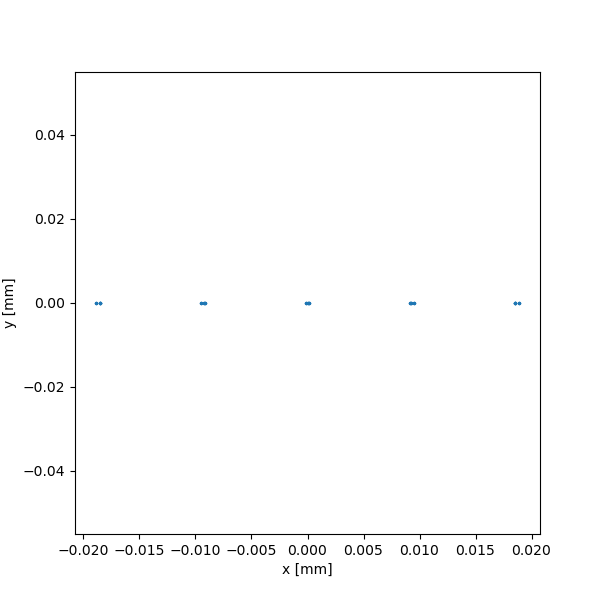

In [409]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
ms = 8.
# linea = plt.scatter(xy[:,0], xy[:,1], s=2.)
lineb = plt.scatter(pos[:,0], pos[:,1], s=2.)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')


In [413]:
lineb.get_offsets().data.shape

(45, 2)

interactive(children=(FloatSlider(value=-4.2, description='eps_long', layout=Layout(height='30px', width='80%'…

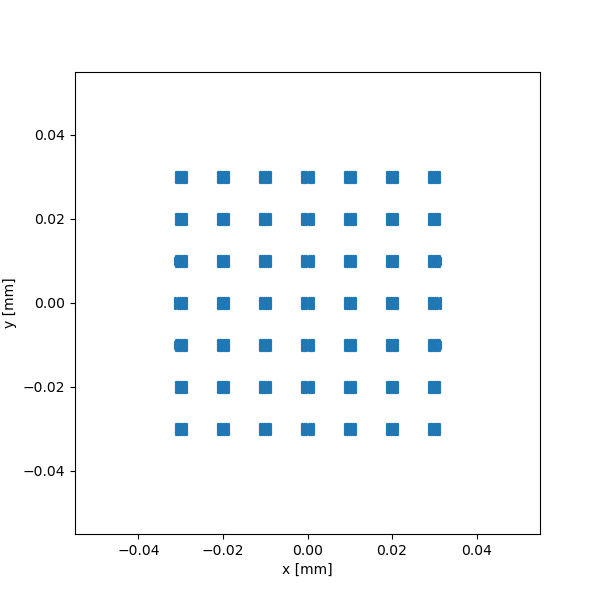

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
ms = 8.
# linea = plt.scatter(xy[:,0], xy[:,1], s=2.)
pos = np.zeros((10,2))
lineb = plt.scatter(pos[:,0], pos[:,1], s=2.)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

cavfct = LensCavML

def update_xygrid(cavfct, eps_long=-4.2, eps_grin=0.35, eps_mirr2=0, eps_mla=3.0, Nbundle = 3, Narr = 2, div=0.02, **kwargs):
    elements = LensCavML(eps_long=eps_long, eps_grin=eps_grin, eps_mla=eps_mla, eps_mirr2=eps_mirr2)
    # elements = LensCavML()
    screen = elements[0]
    sys = RaySystem(elements, add_screen=False)
    sys.screen = screen
    
    Mag = 6/100.0
    
    mu = np.stack([[xx, yy, sx, sy] for xx in np.linspace(-0.5*Narr, 0.5*Narr, 2*Narr+1) for yy in np.linspace(-0.5*Narr, 0.5*Narr, 2*Narr+1) for sx in np.linspace(-0.1, 0.1, Nbundle)*div for sy in np.linspace(-0.1, 0.1, Nbundle)*div], axis=0)
    bundle_id = np.stack([a for a in np.arange(2*Narr+1) for b in np.arange(Nbundle) for c in np.arange(Nbundle)], axis=0)
    viridis = plt.cm.viridis
    N = 2*Narr+1
    # Extract N evenly spaced colors from viridis
    colors = viridis(np.linspace(0, 1, N))
    
    ray = sys.screen.eigenvectors_to_rays(mu)
    traj = sys.propagate(ray, at_screen=False, clip=False)
    # linea.set_offsets(xy)
    pos = traj[8,0,:,[0,1]].T
    lineb.set_offsets(pos)

    fig.canvas.draw_idle()
        
_magnitude = lambda x: 1. if abs(x)<0.1 else int(np.floor(np.log10(abs(x))))
_sgn = lambda x: 1 if x>0 else -1
_min = lambda x: -1 if x==0 else (10*x if x<0 else 0.1*x)
_max = lambda x: 1 if x==0 else (0.1*x if x<0 else 10*x)


lo = Layout(width='80%', height='30px')

sliders = {v.name: FloatSlider(value=v.default, min=_min(v.default), max=_max(v.default), step=10**(_magnitude(v.default)-2), readout_format='.2e', layout=lo) for v in inspect.signature(cavfct).parameters.values() if not v.name.endswith('_thick') }

sliders.update({'Nbundle': IntSlider(value=6, min=1, max=7,  layout=lo)})
sliders.update({'Narr': IntSlider(value=3, min=1, max=7,  layout=lo)})
sliders.update({'div': FloatSlider(value=0.03, min=0, max=0.2, step=0.01, layout=lo)})
interactive(update_xygrid, cavfct=fixed(cavfct), **sliders)
# update_xygrid(cavfct)

In [406]:
plt.close('all')

In [ ]:
try:
    plot.close()
except:
    pass
plot = k3d.plot(camera_auto_fit=True, antialias=True)

for i, el in enumerate(sys.elements):
    if not isinstance(el, Screen):
        plot += el.plot(opacity=0.4)

for i, el in enumerate(sys.elements):
    plot_element_ax(el, plot, length=2.)

# plot_rays(ray, plot)
plot_trajs(traj[0:7], plot)
plot_trajs(traj[6:], plot, color=0x555500)

plot.display()

C:\Users\simonlab\.conda\envs\sloppy\Lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


In [25]:
cavfct = LensCavAsphSimple
parname = 'eps_grin'
res = degeneracy_length(cavfct, parname, 1)
Ldeg = res.x
print(res)
elements = cavfct(**{parname: Ldeg})
sys = RaySystem(elements)
system = sys.abcd
mu1, mu2 = system.q

 message: NaN result encountered.
 success: False
  status: 2
     fun: nan
       x: 0.0
     nit: 1
    nfev: 1


In [25]:
def _cavity_parameter_interaction_factory(cavfct, parname, scanrange, N = 300):
    fig, ax = plt.subplots(ncols=2, figsize=(8,4), sharex=True)
    lws = [ax[0].plot([0, 1], [0, 1])[0] for i in range(2)]
    ax[0].set_ylabel('um')
    lfs = [ax[1].plot([0, 1], [0, 1])[0] for i in range(4)]
    ax[1].set_ylabel('MHz')
    axh1 = ax[1].axhline(0, color='grey')
    axv0 = ax[0].axvline(0, color='grey')
    axv1 = ax[1].axvline(0, color='grey')
    plt.show()
    
    def update_waists_vs_params(cavfct, parname, scanrange, N = 300, **kwargs):
        stab = lambda m: abs(0.5*np.trace(m))<1
        scanrange=[-5, 3]
        La = kwargs[parname]
        Las = La + np.linspace(-scanrange[0], scanrange[0], N)
        ms = np.zeros((N))
        ws = np.zeros((N,2))
        freqs = np.zeros((N,4))
        for i, l in enumerate(Las):
            pardct = kwargs.copy()
            pardct.update({parname: l})
            sys = RaySystem( cavfct(**pardct), add_screen=False )

            try:
                system = sys.abcd
                w = system.waist_at(0)
            except:
                ws[i,:] = np.nan
                ms[i] = np.nan
                freqs[i,...] = np.nan
            else:
                ms[i] = stab(system.abcd_rt)
                ws[i,:] = np.sort(w)
                freqs[i,...] = np.concatenate(system.get_freqs(s=1))
                #ft, fs3 = system.get_freqs()
                #fsr = system.fsr
                #freqs[i,...] = np.concatenate((ft, np.mod(3*ft, fsr)))
                idx = np.argmin(np.abs(freqs[:,2]))
        for i in range(2):
            lws[i].set_data(np.stack((Las, ws[:,i]*1e3), axis=0))
        for i in range(4):
            lfs[i].set_data(np.stack((Las, freqs[:,i]*1e-6), axis=0))
        axv0.set_xdata([Las[idx], Las[idx]])
        axv1.set_xdata([Las[idx], Las[idx]])
        Ldeg = Las[idx]
        ax[0].set_xlim(Las[0], Las[-1])
        ax[0].set_ylim(0.8*np.nanmin(ws*1e3), 1.1*np.nanmax(ws*1e3))
        ax[1].set_ylim(0.8*np.nanmin(freqs*1e-6), 1.1*np.nanmax(freqs*1e-6))
        fig.canvas.draw_idle()
    
    _magnitude = lambda x: 1. if abs(x)<0.1 else int(np.floor(np.log10(abs(x))))
    _sgn = lambda x: 1 if x>0 else -1
    _min = lambda x: -1 if x==0 else (1.5*x if x<0 else 0.5*x)
    _max = lambda x: 1 if x==0 else (0.5*x if x<0 else 1.5*x)

    
    lo = Layout(width='80%', height='30px')
    for v in inspect.signature(cavfct).parameters.values():
        print(v.name, v.default)
    sliders = {v.name: FloatSlider(value=v.default, min=_min(v.default), max=_max(v.default), step=10**(_magnitude(v.default)-2), readout_format='.2e', layout=lo) for v in inspect.signature(cavfct).parameters.values()}
    sliders.update({'scanrange': FloatLogSlider(value=scanrange, min=-3, max=1, step=0.5, layout=lo)})
    return interactive(update_waists_vs_params, cavfct=fixed(cavfct), parname = fixed('eps_grin'), N=fixed(N), **sliders)

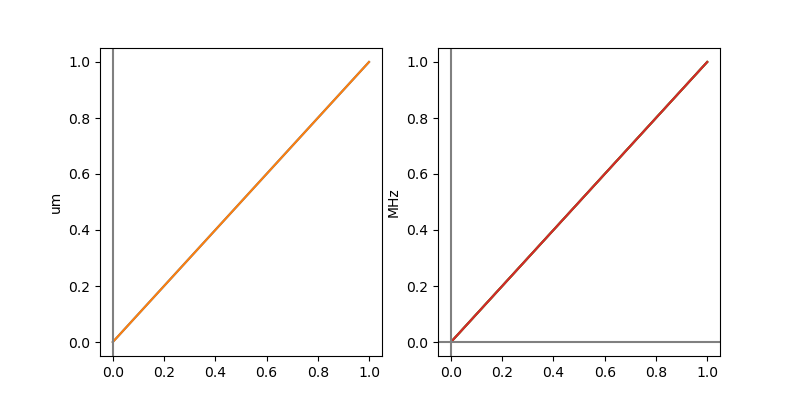

flong 100.0
fmla 14.2
eps_grin -0.37
eps_long -4.2
eps_mirr 0
eps_mla 2.0
lens_diam 25.4
grin_diam 2.4
grin_thick 1.02
lens_thick 6.0
mla_thick 1.0


interactive(children=(FloatLogSlider(value=0.1, description='scanrange', layout=Layout(height='30px', width='8…

In [27]:
_cavity_parameter_interaction_factory(LensCavML, 'eps_grin',0.1, N=100)

In [8]:
cavfct = LensCavML
elements = cavfct(eps_long=-5.3, eps_grin=-0.0)
sys = RaySystem(elements, add_screen=False)
system = sys.abcd
mu1, mu2 = system.q

system.is_stable

curved glass, aligned_with_normal True 1.0
curved glass, aligned_with_normal True -45.37
curved glass, aligned_with_normal True 0.84066
curved glass, aligned_with_normal False -0.84066
curved glass, aligned_with_normal False 45.37
curved glass, aligned_with_normal True -45.37
curved glass, aligned_with_normal True 0.84066
curved glass, aligned_with_normal False -0.84066
curved glass, aligned_with_normal False 45.37
curved glass, aligned_with_normal False -1.0


/Users/lukas/code/sloppy/src/sloppy/abcd.py:267: RuntimeWarning: invalid value encountered in sqrt
  musN = [mus[:,i]*np.sqrt(2/nn0[i]) for i in range(len(mus))]
/Users/lukas/code/sloppy/src/sloppy/abcd.py:278: RuntimeWarning: invalid value encountered in sqrt
  musN = np.stack([mus[:,i]*np.sqrt(2/N[i]) for i in range(2)], axis=0)


False

In [9]:
x = np.linspace(0, system.Ltot, 5000)
ws = system.compute_waists(x)
plt.figure()
plt.plot(x, ws)
for i, e in enumerate(system.elements):
    if type(e)!=Prop:
        plt.axvline(e.x, color='grey', ls=':')
# plt.yscale('log')
plt.show()

LinAlgError: Array must not contain infs or NaNs

In [109]:
sys.elements

In [112]:
pos = [e.p for e in sys.elements]

abcd = []
for i, el in enumerate(sys.elements):
    if i>0:
        d = np.linalg.norm(pos[i-1]-pos[i])
    else:
        d = 0
    if isinstance(el, Glass) or isinstance(el, ThorlabsAsphere) or isinstance(el, CurvedGlass) or isinstance(el, MicroLensArray):
        info = f" n1={el.n1}, n2={el.n2}"
        if hasattr(el, 'R'):
            info += f", R={el.R}"
    else:
        info = ""
        
    print(i, el, d, info)
    if isinstance(el, Glass) or isinstance(el, CurvedGlass) or isinstance(el, FreeFormInterface) or isinstance(el, ThorlabsAsphere):
        #modify index of refraction in propagation according to Glass element
        abcd.extend([Prop(d, n=el.n1), ABCD(el.m), ABCD(el.Rbasis)])
    else:
        abcd.extend([Prop(d), ABCD(el.m), ABCD(el.Rbasis)])

0 <sloppy.optic.Screen object at 0x2aba7bb60> 0 
1 <sloppy.optic.MicroLensArray object at 0x2ac689700> 5.949999999999989  n1=1.4537, n2=1.0, R=2.7222
2 <sloppy.optic.Glass object at 0x2abe24ce0> 4.0  n1=1.0, n2=1.4537
3 <sloppy.optic.CurvedGlass object at 0x2aba78ec0> 100.05  n1=1.4537, n2=1.0, R=-45.37
4 <sloppy.optic.Glass object at 0x2abe253a0> 6.0  n1=1.0, n2=1.4537
5 <sloppy.optic.ThorlabsAsphere object at 0x2abe24230> 96.2  n1=1.4537, n2=1.0
6 <sloppy.optic.Glass object at 0x2aba56660> 1.02  n1=1.0, n2=1.4537
7 <sloppy.optic.Glass object at 0x2aba79880> 1.6  n1=1.0, n2=1.4537
8 <sloppy.optic.ThorlabsAsphere object at 0x2aba790a0> 1.02  n1=1.4537, n2=1.0
9 <sloppy.optic.Glass object at 0x2aba7a480> 96.2  n1=1.0, n2=1.4537
10 <sloppy.optic.CurvedGlass object at 0x2aba7a9c0> 6.0  n1=1.4537, n2=1.0, R=-45.37
11 <sloppy.optic.Mirror object at 0x2ab7d00e0> 95.99999999999999 
12 <sloppy.optic.CurvedGlass object at 0x2aba7a9c0> 95.99999999999999  n1=1.4537, n2=1.0, R=-45.37
13 <sloppy.op

In [51]:
system = ABCDSystem(abcd)

In [52]:
sys.elements[2].p

array([0.  , 0.  , 1.82])

In [53]:
system.elements[4].m

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68789984, 0.        ],
       [0.        , 0.        , 0.        , 0.68789984]])

In [54]:
for i, e in enumerate(system.elements):
    if not np.allclose(e.m, np.identity(4, dtype=np.float64)): 
        print(i, type(e), e.x)

3 <class 'sloppy.abcd.Prop'> 0.0
4 <class 'sloppy.abcd.ABCD'> 0.8
6 <class 'sloppy.abcd.Prop'> 0.8
7 <class 'sloppy.abcd.ABCD'> 1.82
9 <class 'sloppy.abcd.Prop'> 1.82
10 <class 'sloppy.abcd.ABCD'> 73.02
12 <class 'sloppy.abcd.Prop'> 73.02
13 <class 'sloppy.abcd.ABCD'> 79.02
15 <class 'sloppy.abcd.Prop'> 79.02
16 <class 'sloppy.abcd.ABCD'> 154.01999999999998
18 <class 'sloppy.abcd.Prop'> 154.01999999999998
19 <class 'sloppy.abcd.ABCD'> 156.01999999999998
21 <class 'sloppy.abcd.Prop'> 156.01999999999998
24 <class 'sloppy.abcd.Prop'> 162.01999999999998
25 <class 'sloppy.abcd.ABCD'> 168.01999999999998
27 <class 'sloppy.abcd.Prop'> 168.01999999999998
28 <class 'sloppy.abcd.ABCD'> 170.01999999999998
30 <class 'sloppy.abcd.Prop'> 170.01999999999998
31 <class 'sloppy.abcd.ABCD'> 245.01999999999998
33 <class 'sloppy.abcd.Prop'> 245.01999999999998
34 <class 'sloppy.abcd.ABCD'> 251.01999999999998
36 <class 'sloppy.abcd.Prop'> 251.01999999999998
37 <class 'sloppy.abcd.ABCD'> 322.21999999999997
39 

In [302]:
plt.close('all')

In [5]:
Npt = 20
a = 0.5
x = np.linspace(-a, a, Npt)
coords = np.meshgrid(x, x)

xy = np.stack(coords, axis=-1).reshape((-1,2))
#pxy = np.zeros_like(xy)
pxy = np.broadcast_to(np.array([0, 0]), xy.shape)
mu = np.concatenate((xy, pxy), axis=1)
ray = sys.screen.eigenvectors_to_rays(mu)

In [6]:
traj = sys.propagate(ray, at_screen=True)
pos = sys.screen.r_to_screen_coords(traj[-1,0,:,:])

In [7]:
plt.figure()
plt.scatter(xy[:,0], xy[:,1], s=2.)
plt.scatter(pos[:,0], pos[:,1], s=2.)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
ms = 8.
linea = plt.scatter(xy[:,0], xy[:,1], s=2.)
lineb = plt.scatter(pos[:,0], pos[:,1], s=2.)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

cavfct = LensCav
parname = 'lens_dist'

def update_xygrid(dl=0.0, a=0.1, px=1e-2, py=-1e-3, Nrt=3, Npts=20, **kwargs):
    res = degeneracy_length(cavfct, parname, 1e-3)
    Ldeg = res.x
    print(res)
    elements = cavfct(**{parname: Ldeg+dl})
    sys = RaySystem(elements)
    
    x = np.linspace(-a, a, Npts)
    coords = np.meshgrid(x, x)
    xy = np.stack(coords, axis=-1).reshape((-1,2))
    pxy = np.broadcast_to(np.array([px, -py]), xy.shape)
    mu = np.concatenate((xy, pxy), axis=1)
    ray = sys.screen.eigenvectors_to_rays(mu)
    traj = sys.propagate(ray, at_screen=True)
    pos = sys.screen.r_to_screen_coords(traj[-1,0,:,:])
    linea.set_offsets(xy)
    lineb.set_offsets(pos)
  
    #ax.relim()
    #ax.autoscale_view()
    fig.canvas.draw_idle()
        
interactive(update_xygrid, dl=(-1, 1, 1e-3), a = (0,1,1e-2),\
            px=(-0.1,0.1,1e-3), py=(-0.1,0.1,1e-3), Nrt=(0,10,1), Npts=(10, 100, 10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='dl', max=1.0, min=-1.0, step=0.001), FloatSlider(val…

In [31]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
ms = 8.
linea = plt.scatter(xy[:,0], xy[:,1], s=2.)
lineb = plt.scatter(pos[:,0], pos[:,1], s=2.)
plt.xlabel('px [mm]')
plt.ylabel('py [mm]')

cavfct = LensCav
parname = 'lens_dist'

def update_xygrid(dl=0.0, a=5e-2, x=0.004, y=-0.004, Nrt=3, Npts=20, **kwargs):
    res = degeneracy_length(cavfct, parname, 1e-3)
    Ldeg = res.x
    elements = cavfct(**{parname: Ldeg+dl})
    sys = RaySystem(elements)
    
    xx = np.linspace(-a*1e-1, a*1e-1, Npts)
    coords = np.meshgrid(xx, xx)
    pxy = np.stack(coords, axis=-1).reshape((-1,2))
    xy = np.broadcast_to(np.array([x, y]), pxy.shape)
    mu = np.concatenate((xy, pxy), axis=1)
    ray = sys.screen.eigenvectors_to_rays(mu)
    traj = sys.propagate(ray, Nrt=Nrt, at_screen=True)
    pos = sys.screen.r_to_screen_coords(traj[-1,0,:,:])
    linea.set_offsets(pxy)
    lineb.set_offsets(pos)
    plt.xlim(1.5*np.nanmin(pxy[:,0]), 1.5*np.nanmax(pxy[:,0]))
    plt.ylim(1.5*np.nanmin(pxy[:,1]), 1.5*np.nanmax(pxy[:,1]))
    fig.canvas.draw_idle()
interactive(update_xygrid, dl=(-1, 1, 1e-3), a = (0,1,1e-3),\
            x=(-0.1,0.1,1e-3), y=(-0.1,0.1,1e-3), Nrt=(0,10,1), Npts=(10, 100, 10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='dl', max=1.0, min=-1.0, step=0.001), FloatSlider(val…

In [ ]:
res = degeneracy_length(cavfct, parname, 1e-3)
Ldeg = res.x
elements = cavfct(**{parname: Ldeg+dl})
sys = RaySystem(elements)

a = 0.004
pa = 0.006
xx = np.linspace(-a*1e-1, a*1e-1, Npts)
coords = np.meshgrid(xx, xx)
pxy = np.stack(coords, axis=-1).reshape((-1,2))
xy = np.broadcast_to(np.array([x, y]), pxy.shape)
mu = np.concatenate((xy, pxy), axis=1)
ray = sys.screen.eigenvectors_to_rays(mu)
traj = sys.propagate(ray, Nrt=Nrt, at_screen=True)
pos = sys.screen.r_to_screen_coords(traj[-1,0,:,:])
linea.set_offsets(pxy)
lineb.set_offsets(pos)
plt.xlim(1.5*np.nanmin(pxy[:,0]), 1.5*np.nanmax(pxy[:,0]))
plt.ylim(1.5*np.nanmin(pxy[:,1]), 1.5*np.nanmax(pxy[:,1]))

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
ms = 8.
linea = plt.scatter(xy[:,0], xy[:,1], s=1., marker='.')
lineb = plt.scatter(pos[:,0], pos[:,1], s=2.)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

def update_xygrid6(dl=Ldeg, dz=1.5825, a=0.1, px=1e-2, py=-1e-3, Nrt=1, Npts=20, **kwargs):
    elements, _ = SixMirror(dx=dl, dzF=dz)
    sys = RaySystem(elements)
    
    x = np.linspace(-a, a, Npts)
    coords = np.meshgrid(x, x)
    xy = np.stack(coords, axis=-1).reshape((-1,2))
    pxy = np.broadcast_to(np.array([px, -py]), xy.shape)
    mu = np.concatenate((xy, pxy), axis=1)
    ray = sys.screen.eigenvectors_to_rays(mu)
    traj = sys.propagate(ray, at_screen=True, Nrt=Nrt)
    pos = sys.screen.r_to_screen_coords(traj[-1,0,:,:])
    linea.set_offsets(xy)
    lineb.set_offsets(pos)
  
    ax.relim()
    #ax.autoscale_view()
    fig.canvas.draw_idle()
        
interactive(update_xygrid6, dl=(Ldeg-1, Ldeg+1, 1e-2), dz=(0, 1.5825, 1e-2), a = (0,1,1e-2),\
            px=(-0.1,0.1,1e-3), py=(-0.1,0.1,1e-3), Nrt=(1,11,1), Npts=(10, 100, 10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=27.768298126226423, description='dl', max=28.768298126226423, min=26.7…

In [29]:
plt.close("all")